### Testing Trajectories

Magnitude of effects of the different code aspects, including the plasma flow turning, the charging up of the dust, and the magnetic field phase. 

In [62]:
using Pkg
using TOML 
using LinearAlgebra
using DifferentialEquations
using Random
using Plots
using Interpolations 

In [81]:
include(joinpath(@__DIR__, "..", "src", "utils.jl"))
include(joinpath(@__DIR__, "..", "src", "constants.jl"))
include(joinpath(@__DIR__, "..", "src", "magnetic_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plasma_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plotting.jl"))
include(joinpath(@__DIR__, "..", "src", "charging.jl"))
include(joinpath(@__DIR__, "..", "src", "trajectory.jl")) 

EqMotionContinuous! (generic function with 1 method)

Load in parameters 

In [98]:
input_file = joinpath(@__DIR__, "..", "main", "input_values.toml")
input_parameters = load_parameters(input_file) 

println("=== Input Parameters === \n") 
pretty_print_table(input_parameters)  
println("\n")

=== Input Parameters === 

particle_size = 50                                            n_grid = 20                                                 
distance_TS = 1.1967829656e13                                 charging_type = continuous                                  
plasma_model = turning_turning                                q_over_m_value = 16.0                                       
beta_angle = 0.0                                              B_mag_ISM = 6.0e-10                                         
mode = full                                                   distance_Approach = 2.2439680605e12                         
dt = 7000.0                                                   particle_type = silicate                                    
alpha_angle = 180.0                                           plane = both                                                
plot_color = speed                                            plot_vectors = true                               

Analyse trajectories over changing conditions 

In [111]:
input_parameters["plasma_model"] = "turning_turning" 
input_parameters["particle_type"] = "silicate"

input_parameters["r0"] = [ 110.0, 0.0, 15.0 ] .* AU  
input_parameters["B_field_time_offset"] = 7.0 * yr 

input_parameters["particle_size"] = 50
input_parameters["particle_type"] = "silicate"

input_parameters["charging_type"] = "continuous" #"instant" #"constant" #"continuous"
input_parameters["q_over_m_value"] = 60.0 # Only relevant for constant charge. 

input_parameters["dt"] = 10_000

10000

In [112]:
res_traj, saved_charges = ComputeTrajectory(input_parameters); 

--- Solution Characteristics ---
Integration time: 0.0 → 13.0 years
Solution size: (7, 41026)


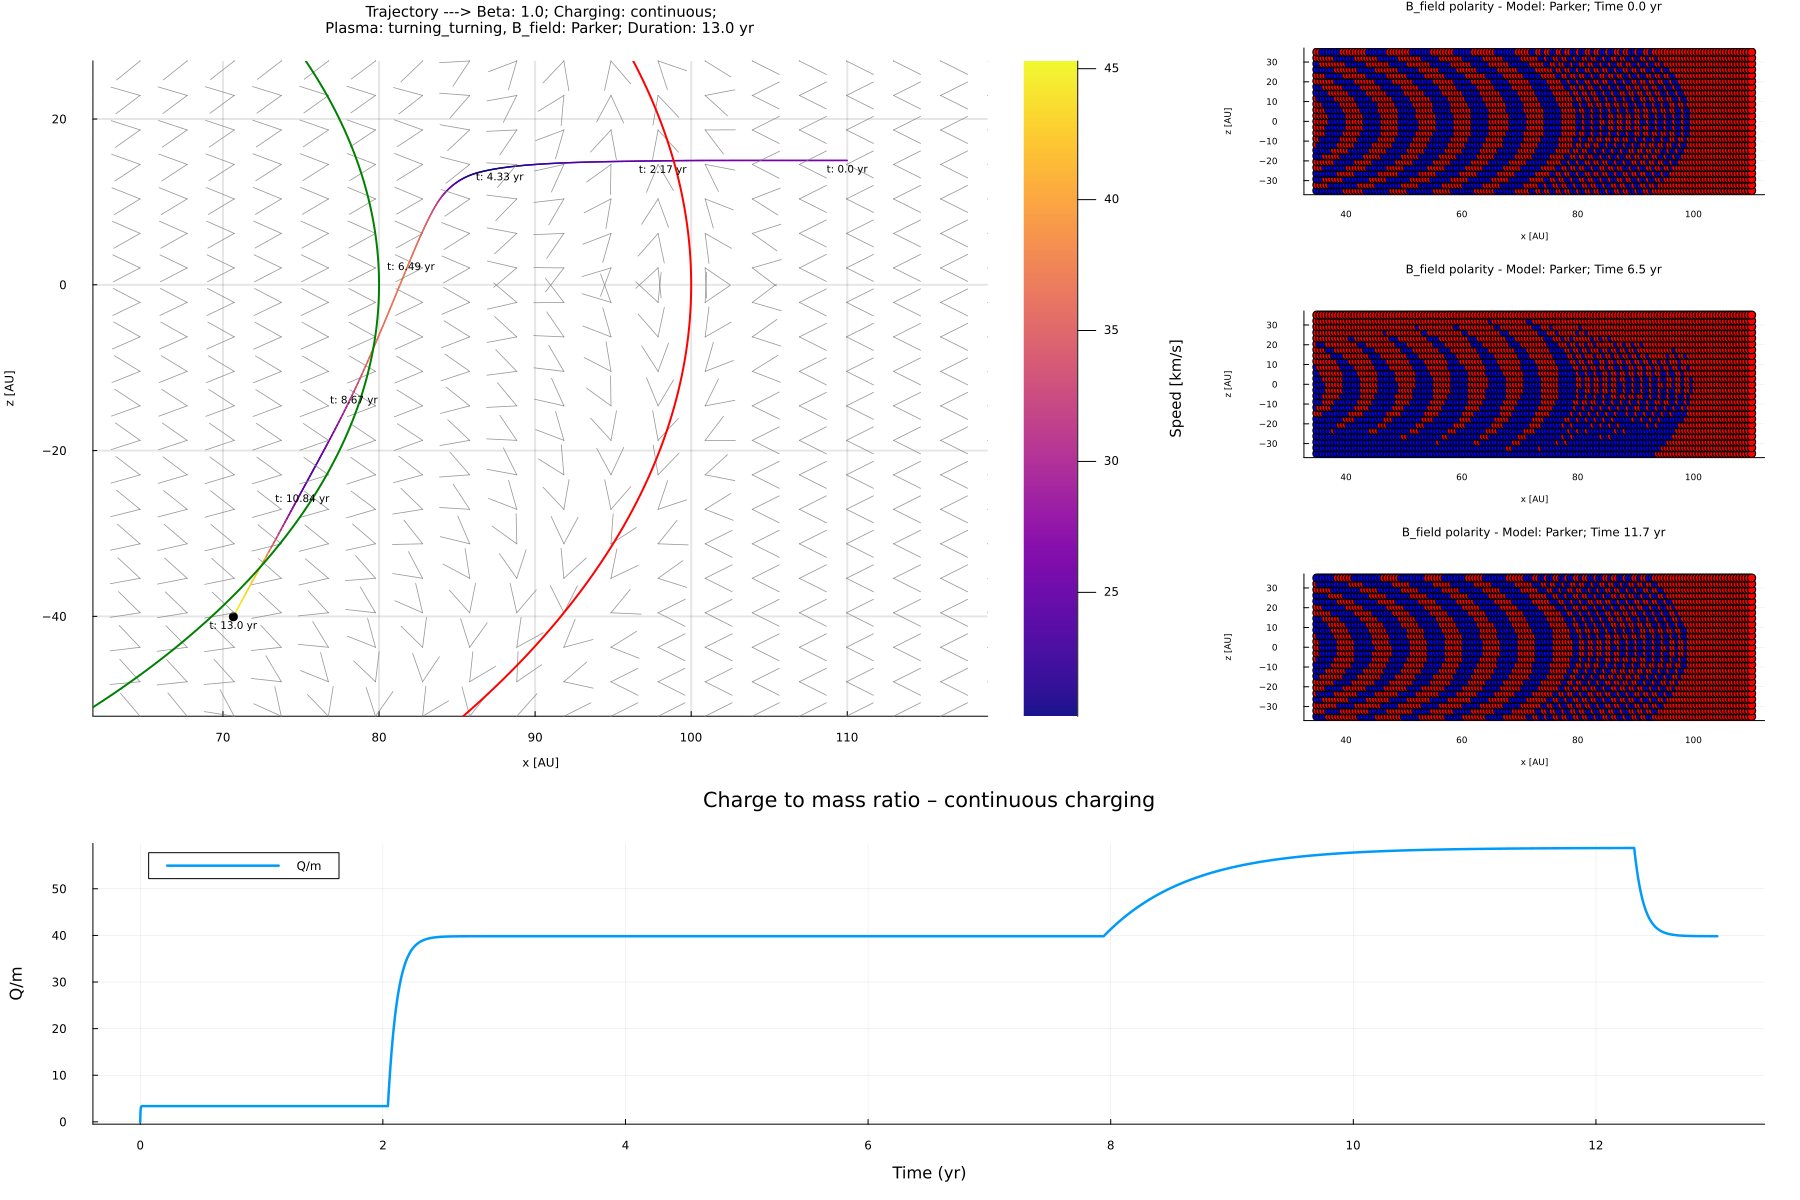

In [113]:
Plotter(res_traj, input_parameters; plot_B_fields=true, charges=saved_charges) 